In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
labels = {
    "ASY": 1,
    "PEA": 2,
    "PGR": 3,
    "VF": 4,
    "VT": 5,
}

In [5]:
path_cut_data = "/home/halli/ux/BMDLab/matlab/resprog/GUI/CleanCutsDL/"
file_cut_data = "cutDataCinCTTI_rev_v2.mat"  # Name of the mat-file, containing the data

mat_cut_data = scipy.io.loadmat(
    path_cut_data + file_cut_data,
    simplify_cells=True,
)["data"]

df = pd.DataFrame(mat_cut_data)
df.head()

,reg_name,patID,t_int,o_label,c_label,s_ecg,s_imp,s_icc,nQRS
0,S_1,1,"[28.035611363636367, 32.03561136363636]",4,4,"[-0.287649, -0.264967, -0.242285, -0.219603, -...","[-0.01228104023227344, -0.012290911848408055, ...","[0.0, -0.0007853573903310096, -0.0015192374520...","[15, 445, 698, 786, 953]"
1,S_1,1,"[49.498, 53.498]",1,1,"[-0.079387, -0.078356, -0.07217, -0.075263, -0...","[0.177948448573244, 0.1771996217803253, 0.1766...","[0.0, -0.0007839844933060789, -0.0015125617588...","[469, 710, 782]"
2,S_1,1,"[98.43039772727272, 102.43039772727272]",1,1,"[-0.040209, -0.040209, -0.038147, -0.039178, -...","[-0.11798159016906515, -0.11641755814308559, -...","[0.0, -0.0007808239060966629, -0.0014972495920...","[38, 188, 449, 708, 855]"
3,S_1,1,"[110.61789772727273, 114.61789772727273]",1,1,"[0.021651, 0.018558, 0.017527, 0.014434, 0.017...","[-0.1465768910808414, -0.13687002075303148, -0...","[-0.01228104023227344, -0.012290911848408055, ...",520
4,S_1,1,"[126.394, 130.394]",1,1,"[-0.090728, -0.089697, -0.090728, -0.089697, -...","[0.1262157219979091, 0.12036175420627249, 0.11...","[0.0, -0.0007828659692674213, -0.0015071338731...","[185, 378, 642, 736]"


Vizualise the original and the consensus rythm labels.

/tmp/ipykernel_20628/1666806236.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["None","ASY", "PEA", "PGR", "VF", "VT"])


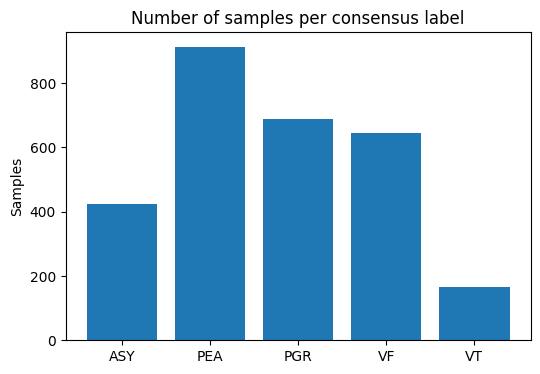

In [25]:
f, ax = plt.subplots(figsize=(6,4))
c_label_count = df["c_label"].value_counts()
ax.bar(c_label_count.index, c_label_count.values)
ax.set_title("Number of samples per consensus label")
ax.set_ylabel("Samples")
ax.set_xticklabels(["None","ASY", "PEA", "PGR", "VF", "VT"])
# o_label_count = df['o_label'].value_counts()
# ax[1].bar(o_label_count.index, o_label_count.values)
# ax[1].set_title("N samples per original label")
plt.savefig("res/samples_per_label.svg")

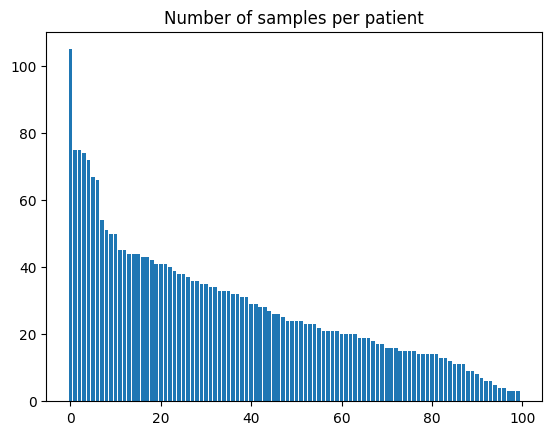

In [42]:
num_classes = df["patID"].nunique()
plt.bar(range(num_classes), df["patID"].value_counts())
plt.title("Number of samples per patient")
plt.show()

Plot a number of random samples to vizualise difference between some of them.

In [43]:
def plot_samples(data: str):
    f, ax = plt.subplots(3, 3)
    ax = ax.ravel()
    for i, a in enumerate(ax):
        a.plot(df.loc[i + 11, data])

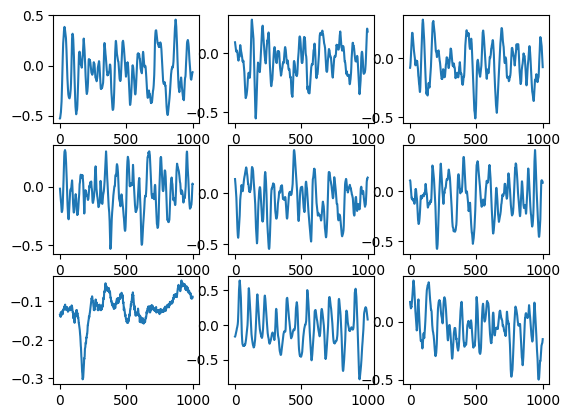

In [44]:
plot_samples("s_ecg")

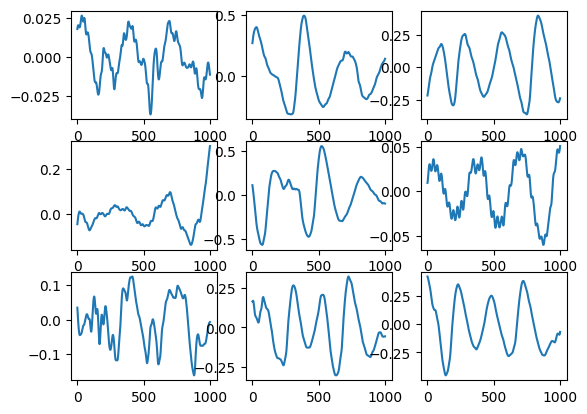

In [45]:
plot_samples("s_imp")

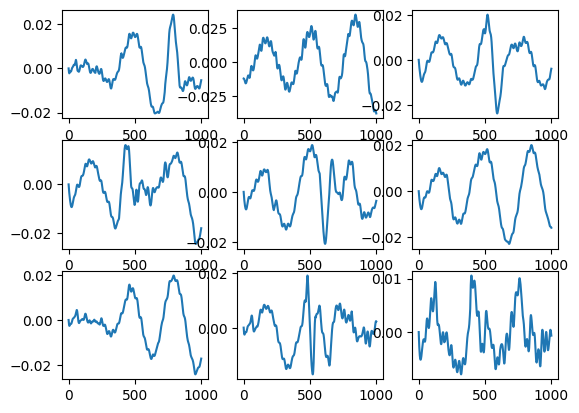

In [46]:
plot_samples("s_icc")

In [47]:
classes, class_count = np.unique(df["c_label"], return_counts=True)
print(f"Number of occurences of each consensus class: {dict(zip(classes,class_count))}")

Number of occurences of each consensus class: {1: 423, 2: 912, 3: 689, 4: 643, 5: 166}


Because of imbalances in the classes we should change the weights per class.
Trying with a Naive method.

In [48]:
# Calculate weights using inverse proportion.
total = len(df["c_label"])
class_counts = df["c_label"].value_counts().sort_index().values
class_weights = dict()
for k, v in enumerate(class_counts):
    class_weights[k] = 1 - (v / total)
class_weights

{0: 0.8506883162725026,
 1: 0.6780797740910696,
 2: 0.7567949170490647,
 3: 0.7730321214260502,
 4: 0.9414048711613131}

In [49]:
def plot_signal_labelled(df, label: str):
    f, ax = plt.subplots(3, 3, sharex=True, sharey=True)

    ax = ax.ravel()
    signal = df.loc[df["c_label"] == labels[label]]

    for i, a in enumerate(ax):
        a.plot(signal.iloc[i]["s_ecg"])
        a.set_ylim(-1.5, 1.5)

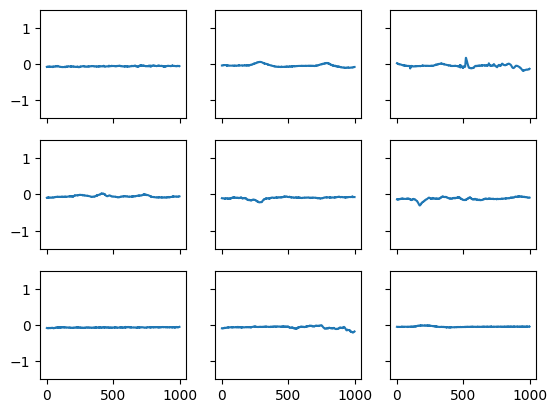

In [50]:
plot_signal_labelled(df, "ASY")

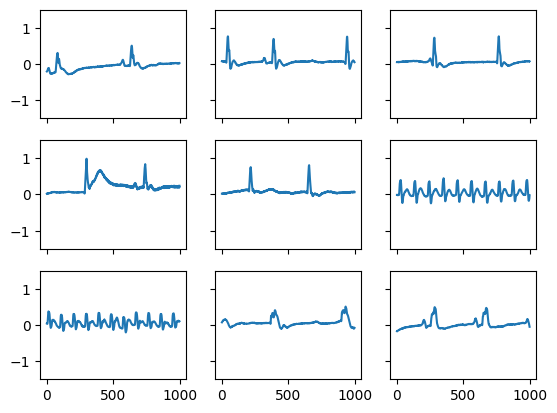

In [51]:
plot_signal_labelled(df, "PEA")

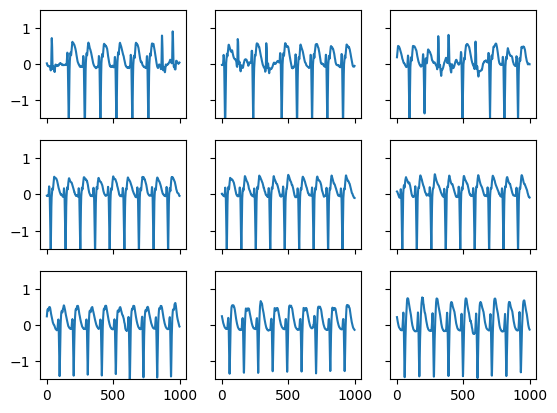

In [52]:
plot_signal_labelled(df, "PGR")

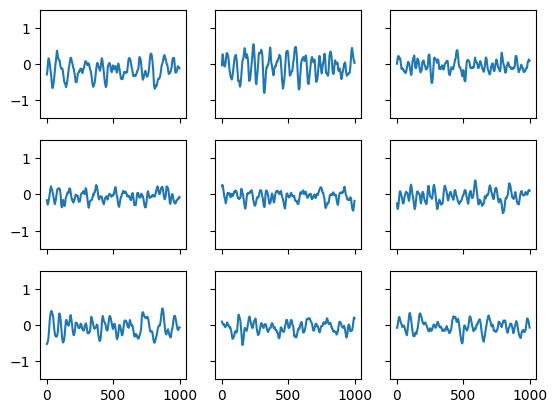

In [53]:
plot_signal_labelled(df, "VF")

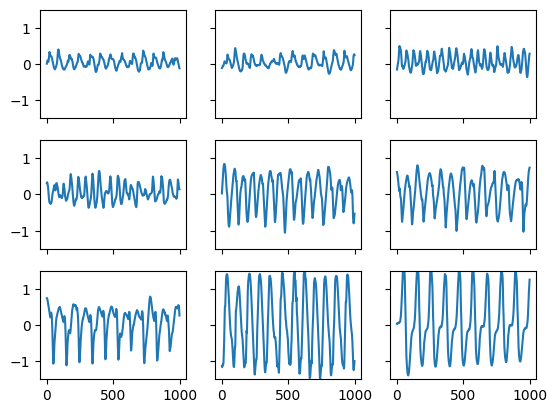

In [54]:
plot_signal_labelled(df, "VT")

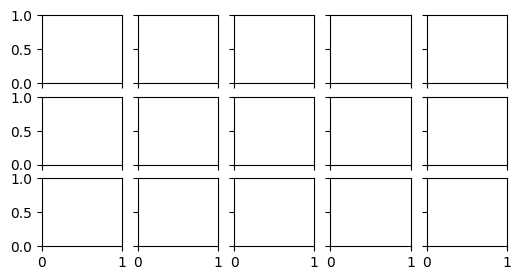

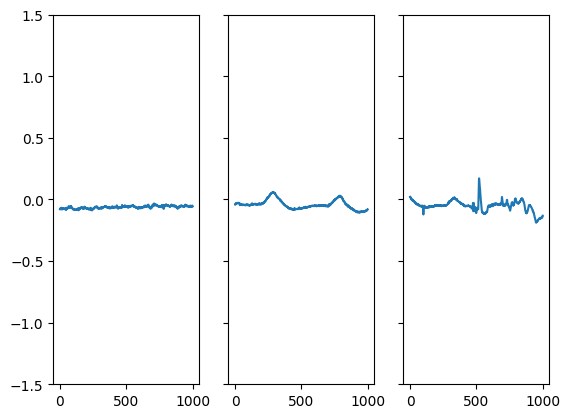

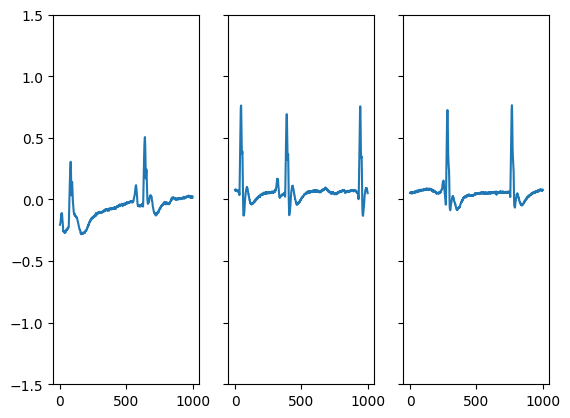

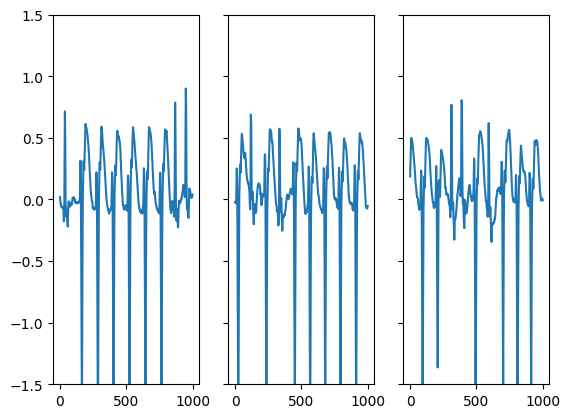

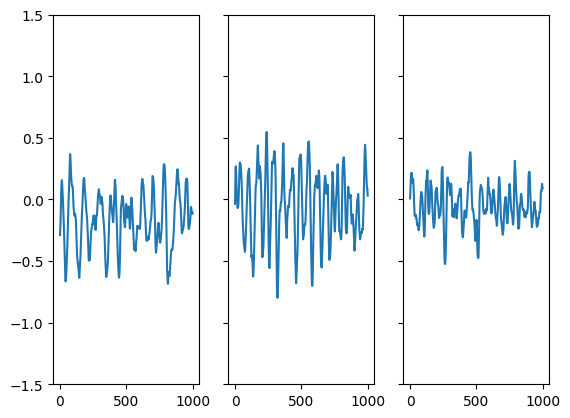

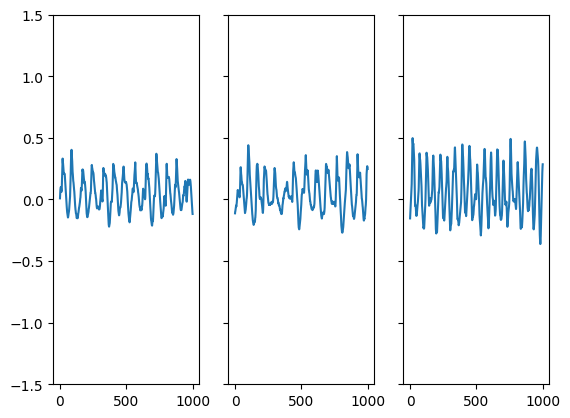

In [36]:
for label in labels:
    signal = df.loc[df["c_label"] == labels[label]]
    f, ax = plt.subplots(1, 3, sharey=True)
    for i in range(3):
        ax[i].plot(signal.iloc[i]["s_ecg"])
    for a in ax.ravel():
        a.set_ylim(-1.5, 1.5)
    plt.savefig(f"res/{label}.svg")